In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [17]:

df = pd.read_csv('classroom_actions.csv') 
df.head() 

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [18]:
df.group.unique() 

array(['experiment', 'control'], dtype=object)

In [19]:
# The total_days represents the total amount of time
total_days = df.total_days.sum()
total_days

283750

In [20]:
# each student has spent in classroom.
student_classtime = df.groupby('id')['total_days'].sum().to_dict()
# student_classtime

In [21]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()
control_mean

73.368990384615387

In [22]:
# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()
experiment_mean

74.671593533487297

In [23]:
# display average classroom time for each group
control_mean, experiment_mean

(73.368990384615387, 74.671593533487297)

In [24]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [25]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    samp = df.sample(df.shape[0], replace=True)
    control_mean = samp.query('group == "control"').total_days.mean()
    experiment_mean = samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [26]:
# convert to numpy array
diffs = np.array(diffs)

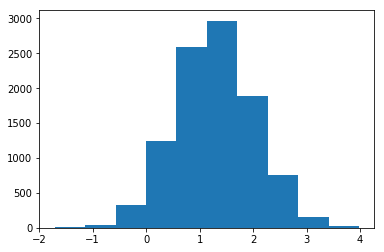

In [27]:
# plot sampling distribution
plt.hist(diffs); 

In [28]:
# simulate distribution under the null hypothesis
diffs_std = diffs.std()
null_vals = np.random.normal(0, diffs_std, diffs.shape[0]) 

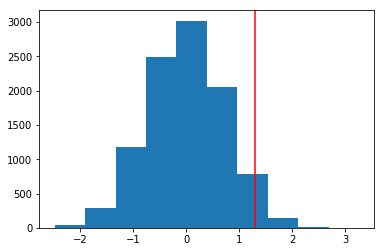

In [29]:
# plot null distribution
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(obs_diff, color='r') 

In [30]:
# compute p value
p_val = (null_vals > obs_diff).mean()
p_val

0.038399999999999997